100%|██████████| 5.35M/5.35M [00:00<00:00, 35.2MB/s]



image 1/1 /home/ayman/ml/pt/yolo/test/67d48fc4bd65b73c.jpg: 384x640 1 person, 1 airplane, 52.8ms
Speed: 5.7ms preprocess, 52.8ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)


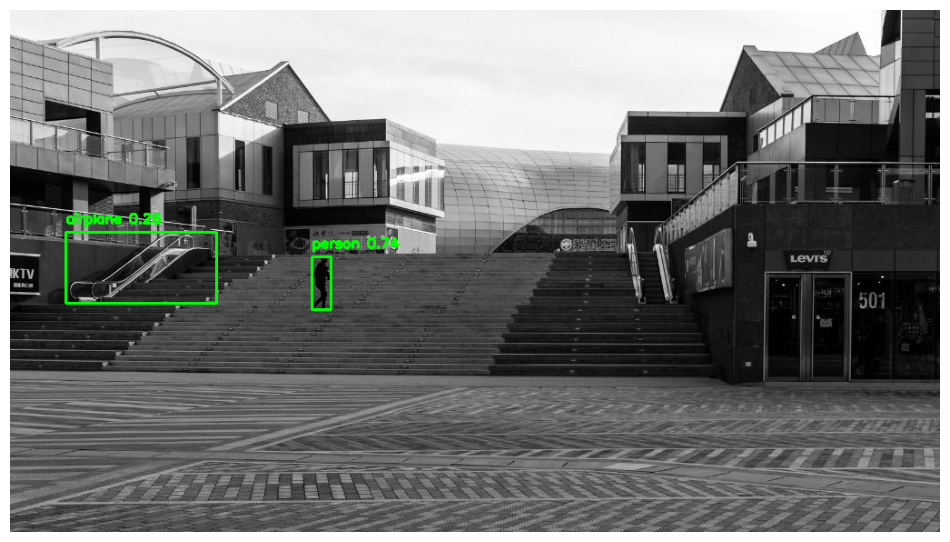


Detections:
Detected person with confidence 0.74
Detected airplane with confidence 0.26


In [14]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def detect_and_display(image_path, conf_threshold=0.25):
    """
    Detect objects and display the image with bounding boxes
    
    Args:
        image_path: Path to image file
        conf_threshold: Confidence threshold for detections
    """
    # Load model
    model = YOLO("yolo11n.pt")
    
    # Run inference
    results = model(image_path, conf=conf_threshold)[0]
    
    # Read image for visualization
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    # Process each detection
    for box in results.boxes:
        # Get box coordinates
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
        # Get confidence and class
        confidence = float(box.conf[0])
        class_id = int(box.cls[0])
        class_name = results.names[class_id]
        
        # Draw box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Add label with confidence
        label = f'{class_name} {confidence:.2f}'
        cv2.putText(image, label, (x1, y1 - 10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Display the image using matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
    # Print detections
    print("\nDetections:")
    for box in results.boxes:
        class_name = results.names[int(box.cls[0])]
        confidence = float(box.conf[0])
        print(f"Detected {class_name} with confidence {confidence:.2f}")

# Example usage
if __name__ == "__main__":
    # Replace with your image path
    image_path = "test/67d48fc4bd65b73c.jpg"
    detect_and_display(image_path)